In [11]:
! pip install customtkinter yfinance pandas_ta matplotlib


$AMZN: possibly delisted; no price data found  (period=1d)


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218925 sha256=780460b6116f8d2db734163af9a4e08545ebbda94e8d2e3029eced07037c115f
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\fd\ed\18\2a12fd1b7906c63efca6accb351929f2c7f6bbc674e1c0ba5d
Successfully built pandas_ta


In [2]:
! pip install --upgrade yfinance

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.48
    Uninstalling yfinance-0.2.48:
      Successfully uninstalled yfinance-0.2.48


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Failed to get ticker 'GOOGL' reason: Expecting value: line 1 column 1 (char 0)
$GOOGL: possibly delisted; no price data found  (period=1y)


$GOOGL: possibly delisted; no price data found  (period=1y)
$GOOGL: possibly delisted; no price data found  (period=1y)
$GOOGL: possibly delisted; no price data found  (period=1y)


C:\Users\ACER\AppData\Local\Temp\ipykernel_26248\1354780745.py:162: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ("Current Price:", f"${df['Close'][-1]:,.2f}"),
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 862, in callit
    func(*args)
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 2955, in focus
    return self.tk.call((self._w, 'focus') + args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
_tkinter.TclError: invalid command name ".!ctkframe3.!ctkframe6.!canvas"
C:\Users\ACER\AppData\Local\Temp\ipykernel_26248\1354780745.py:162: FutureWarning: Series.__getite

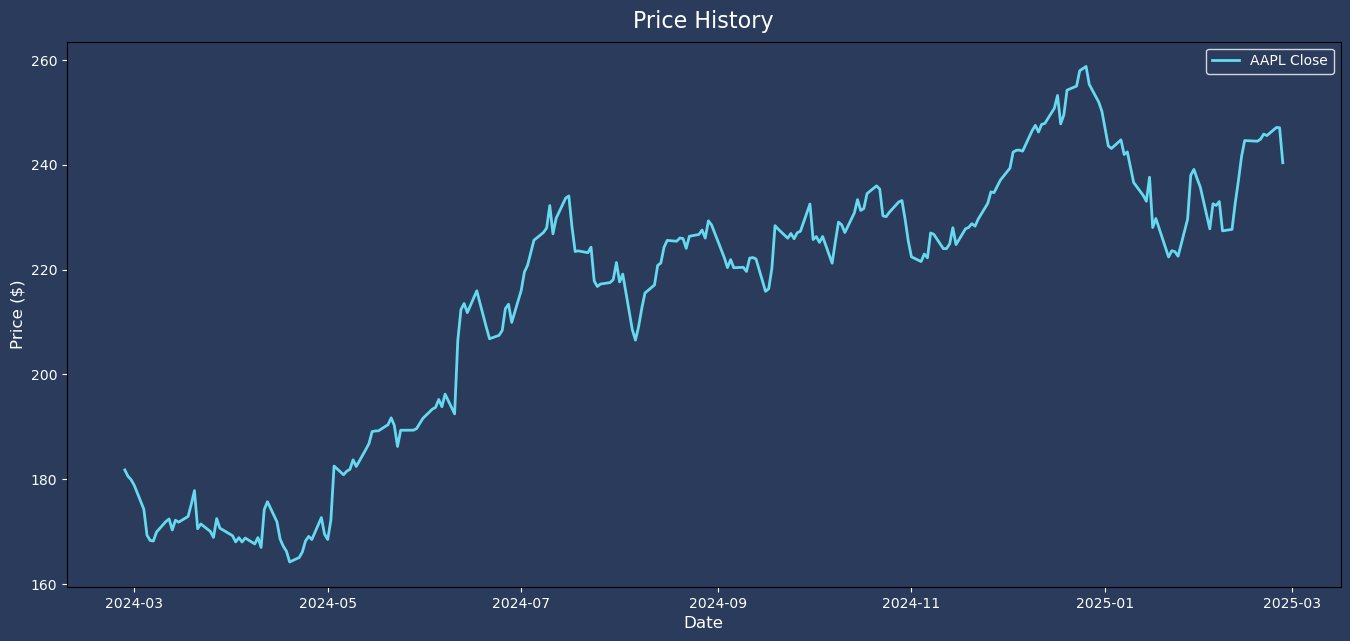

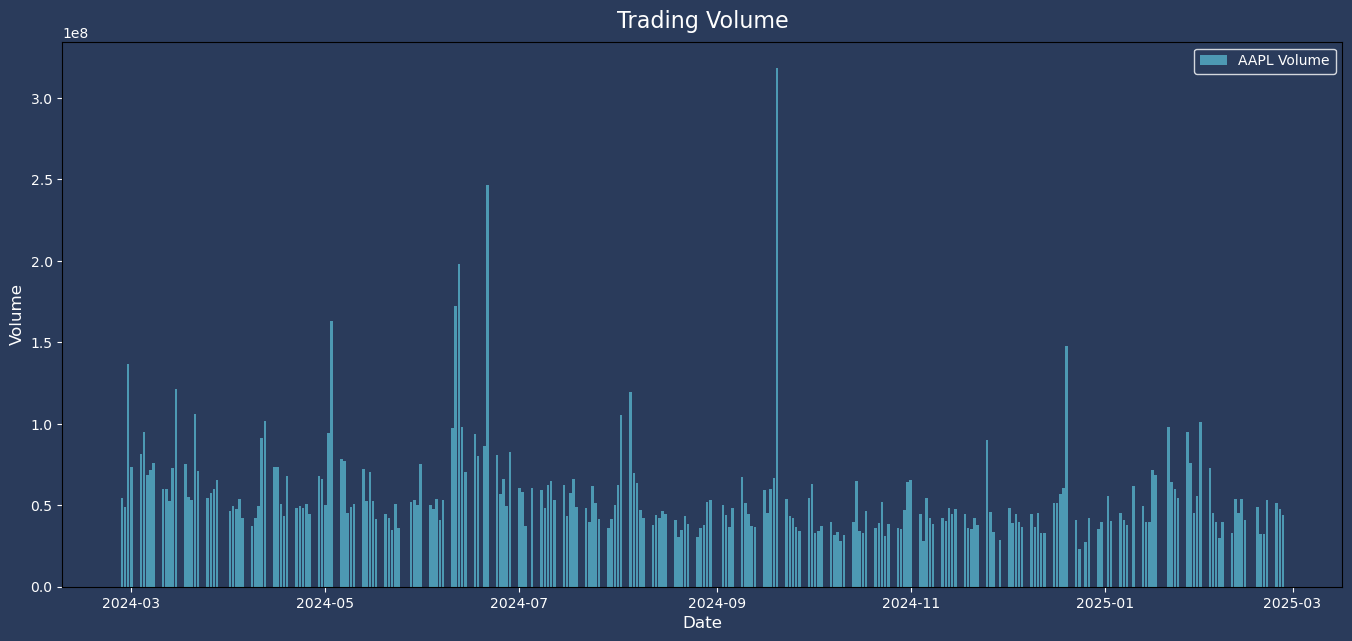

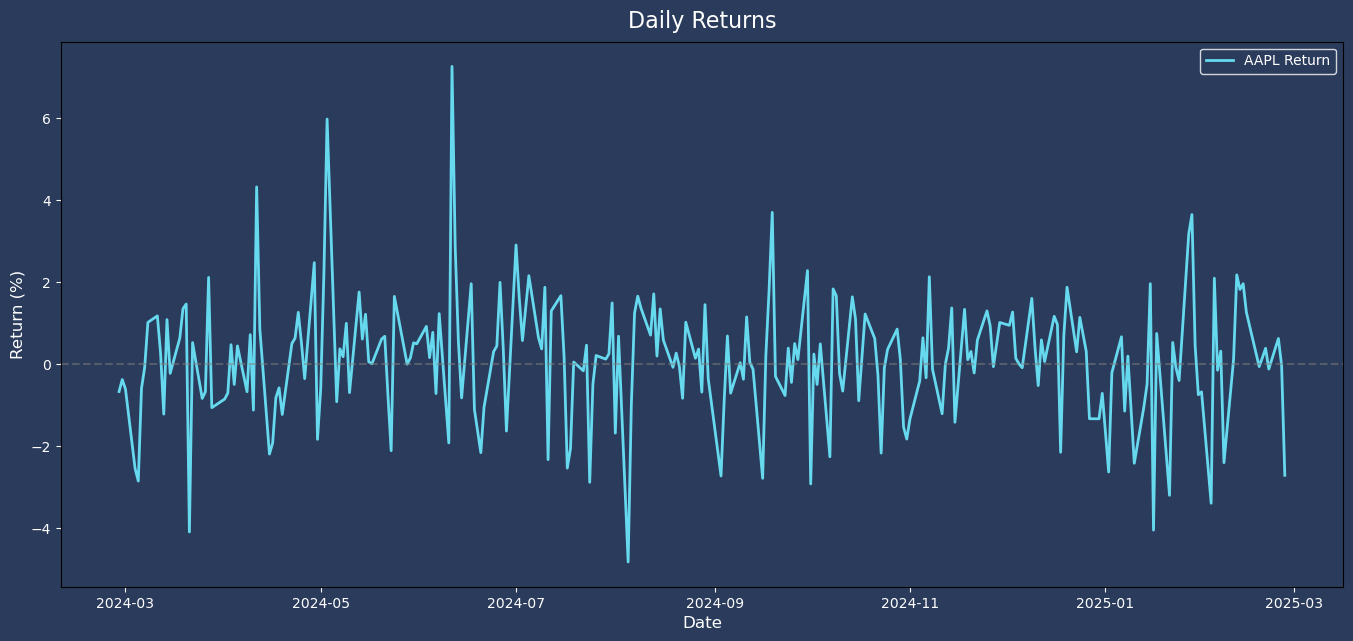

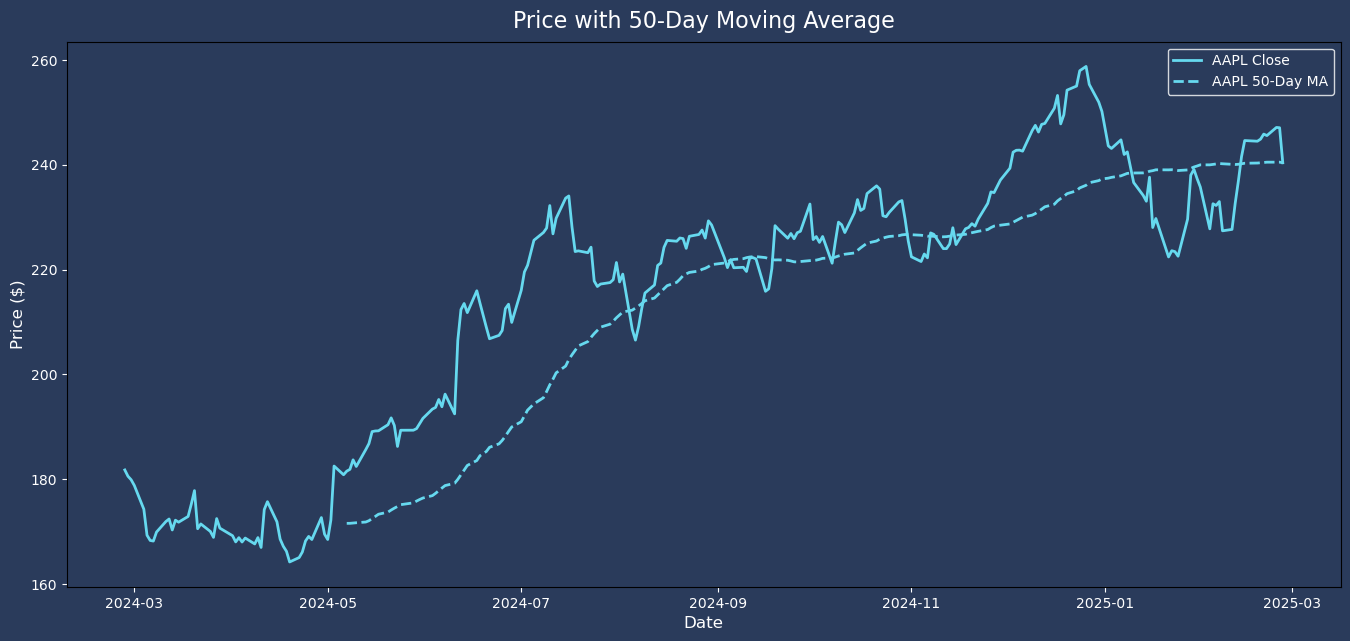

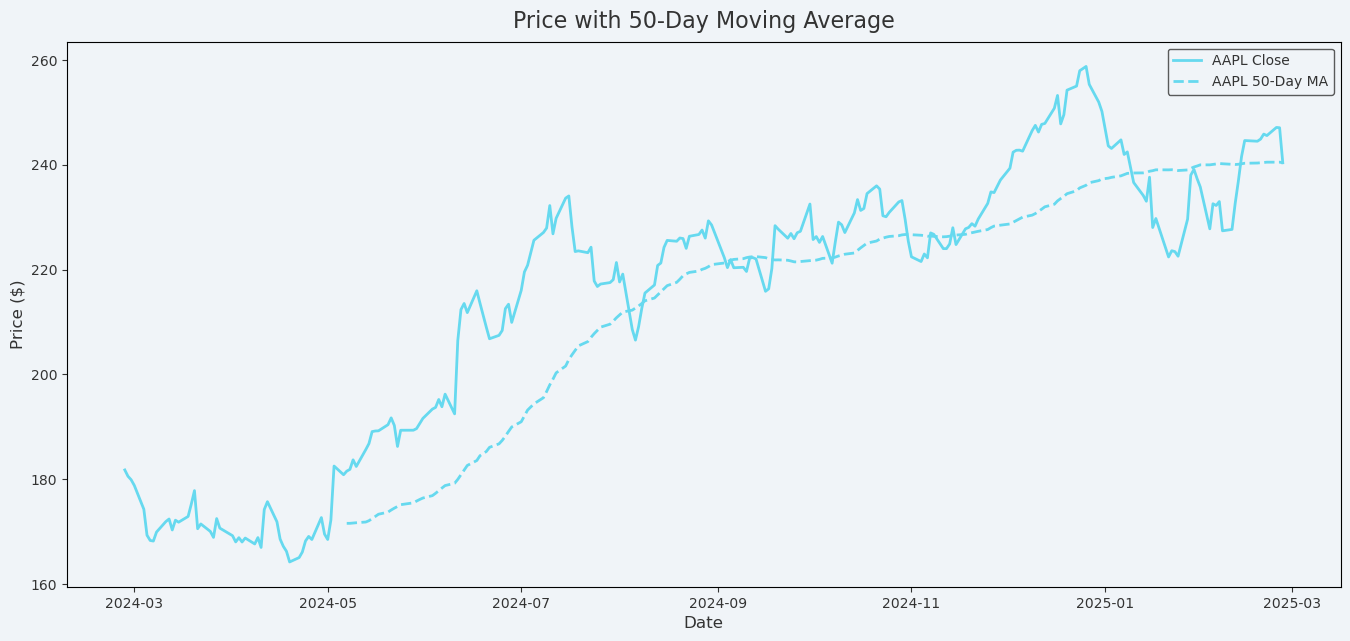

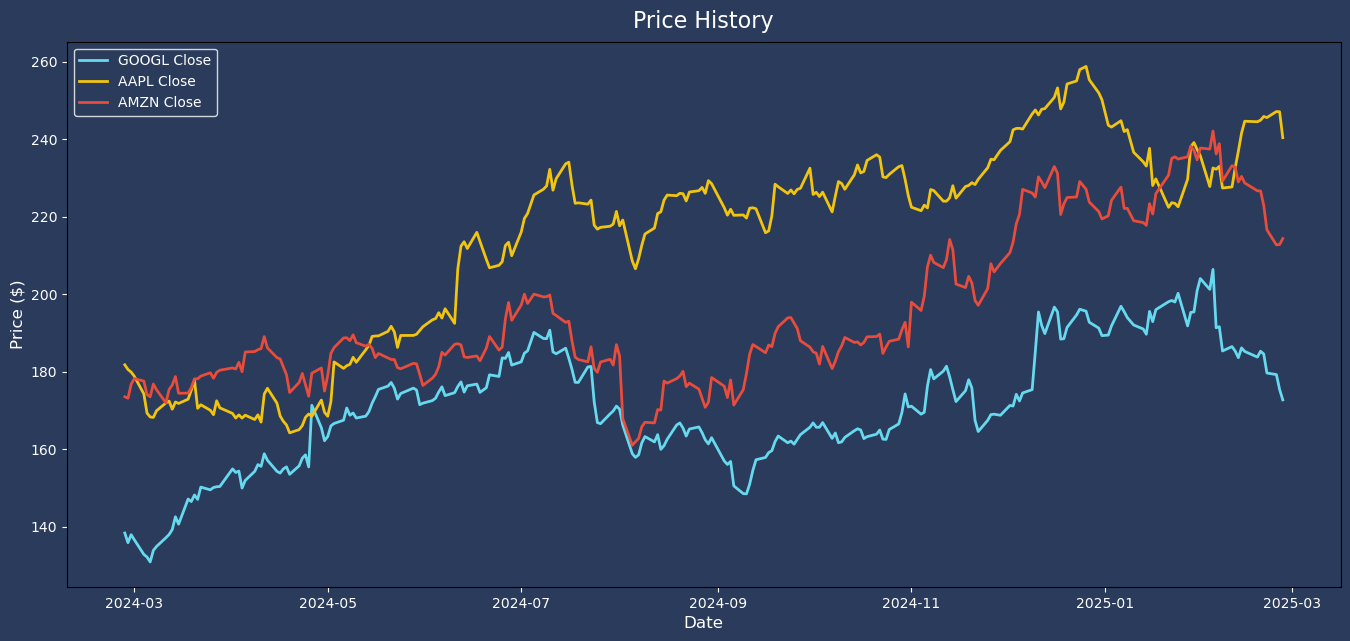

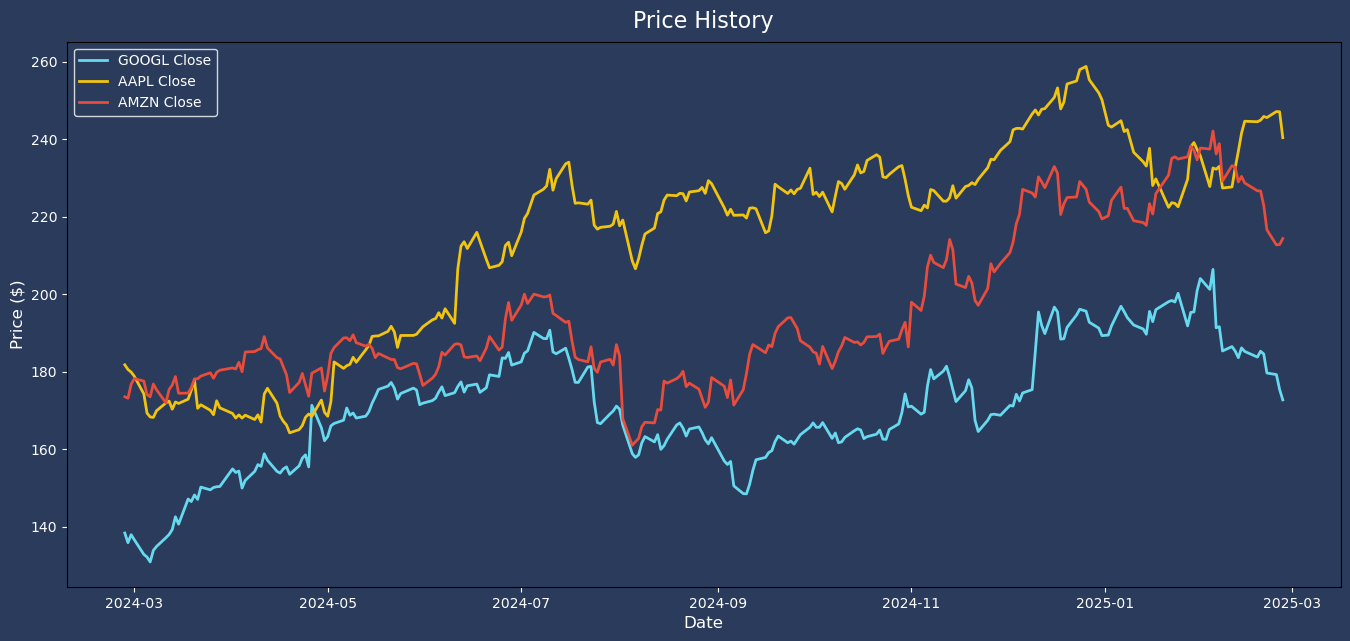

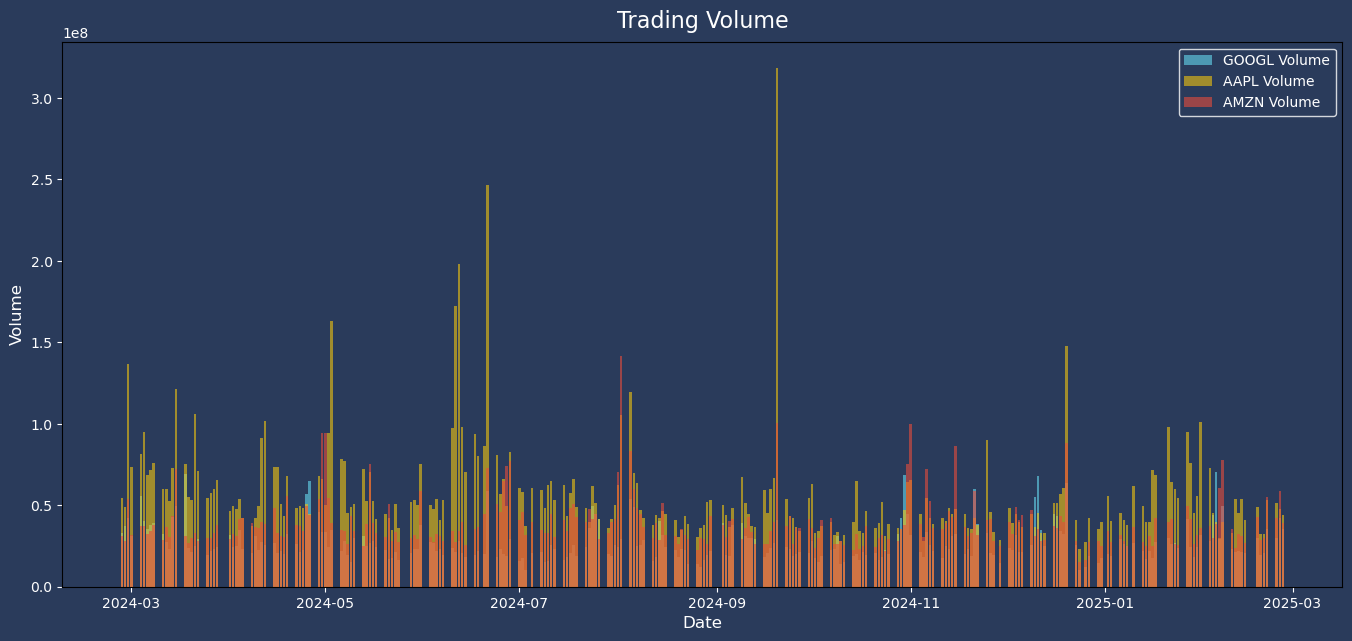

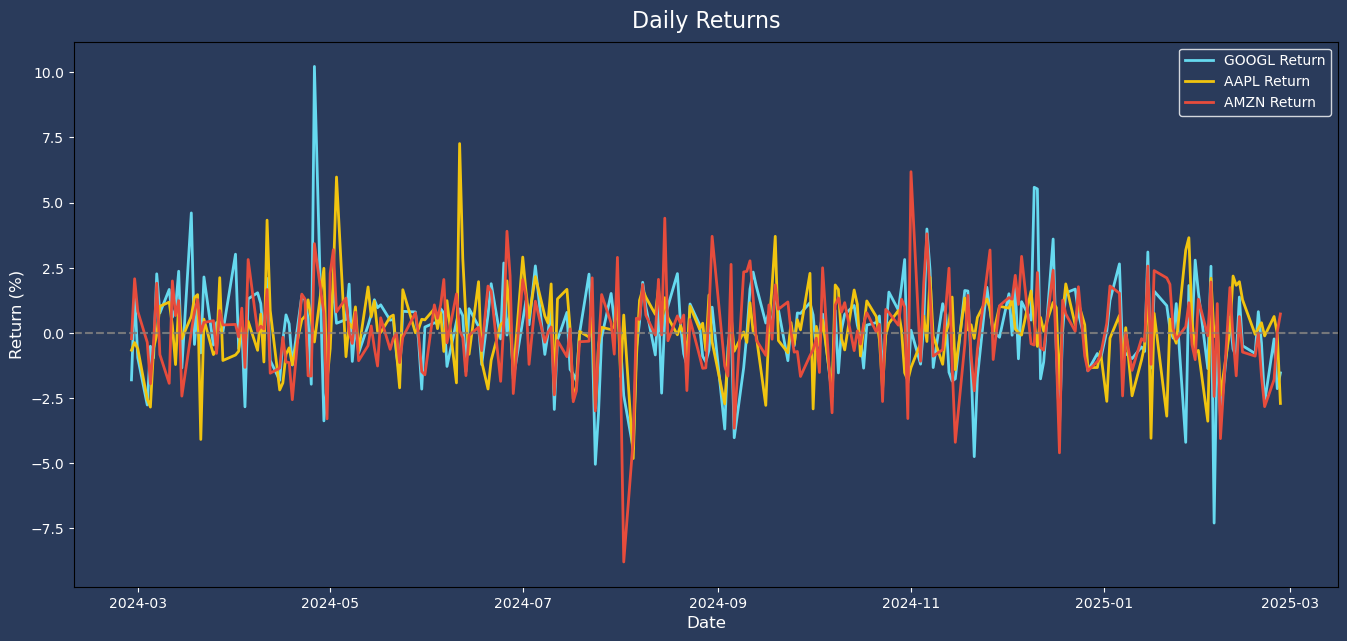

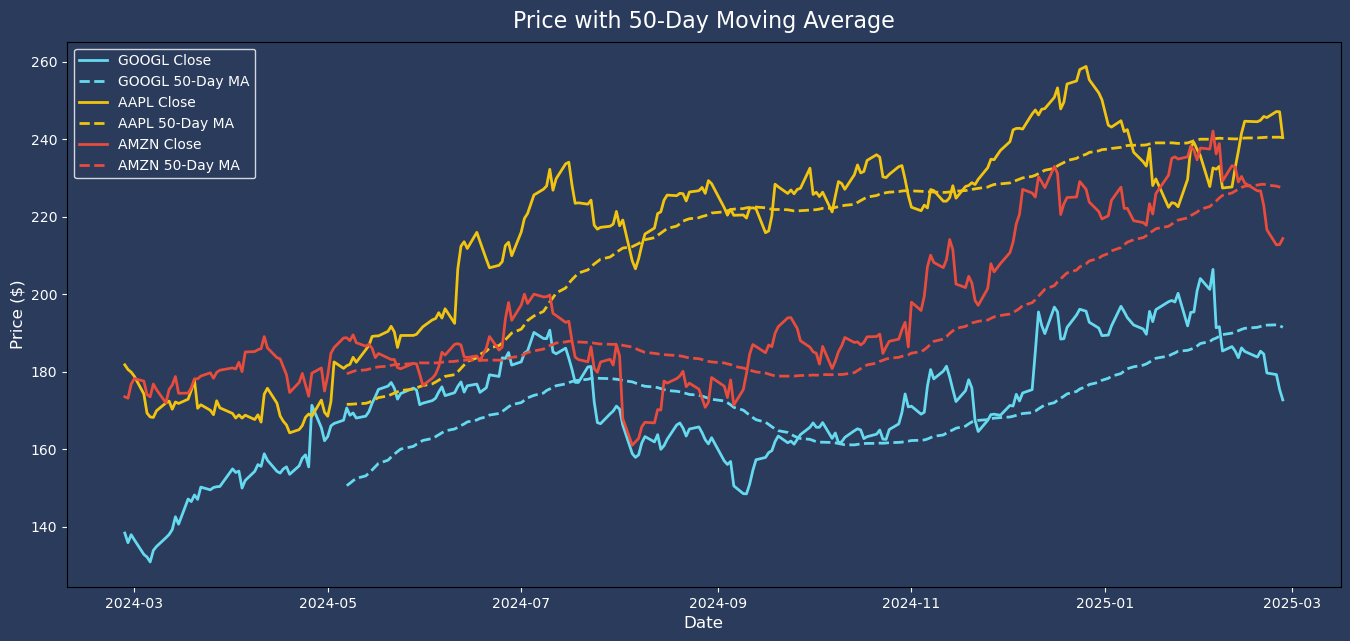

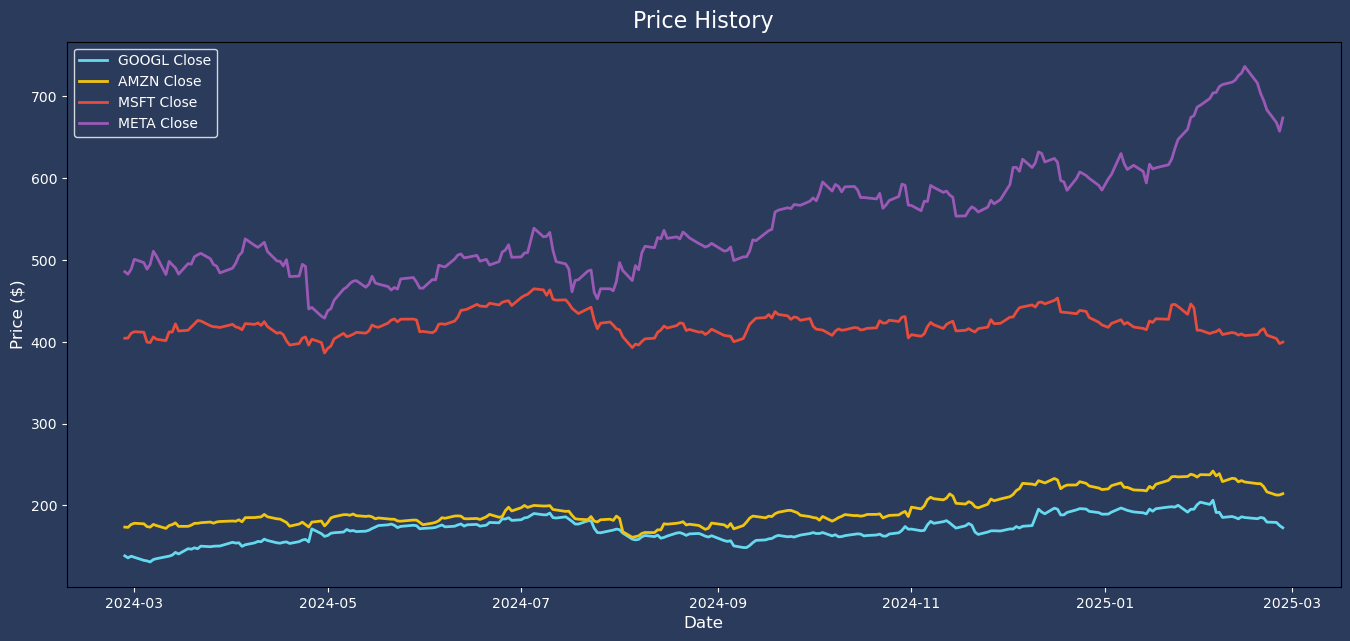

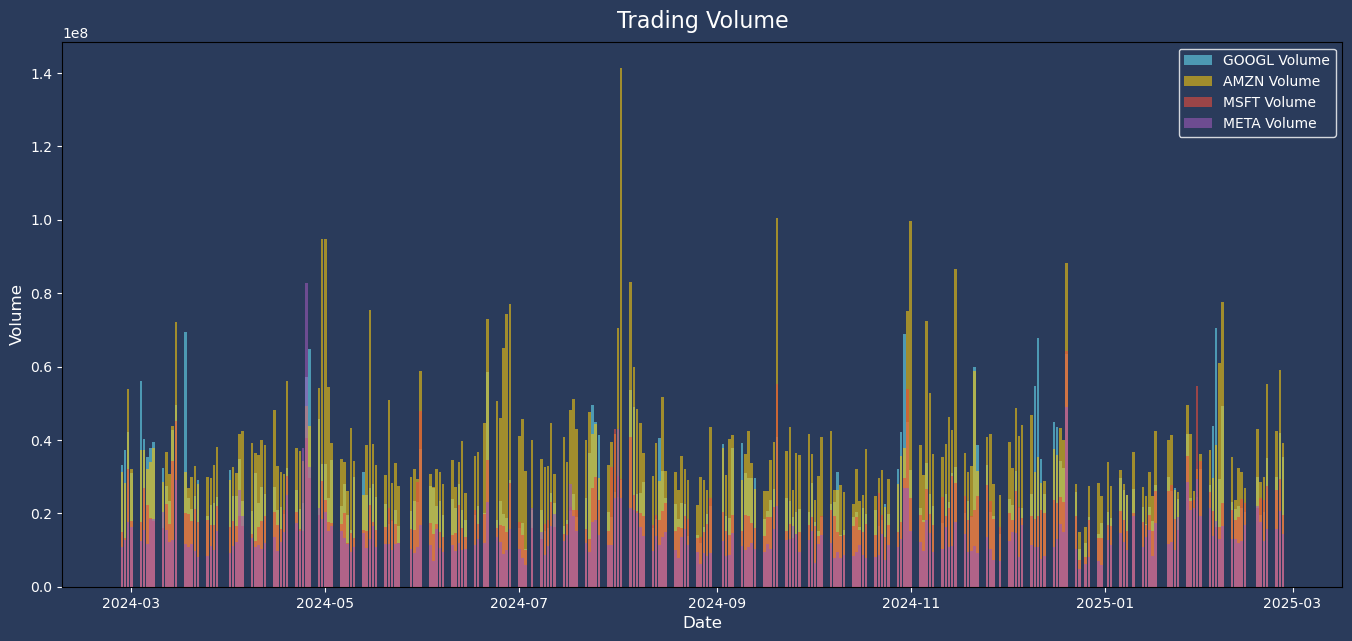

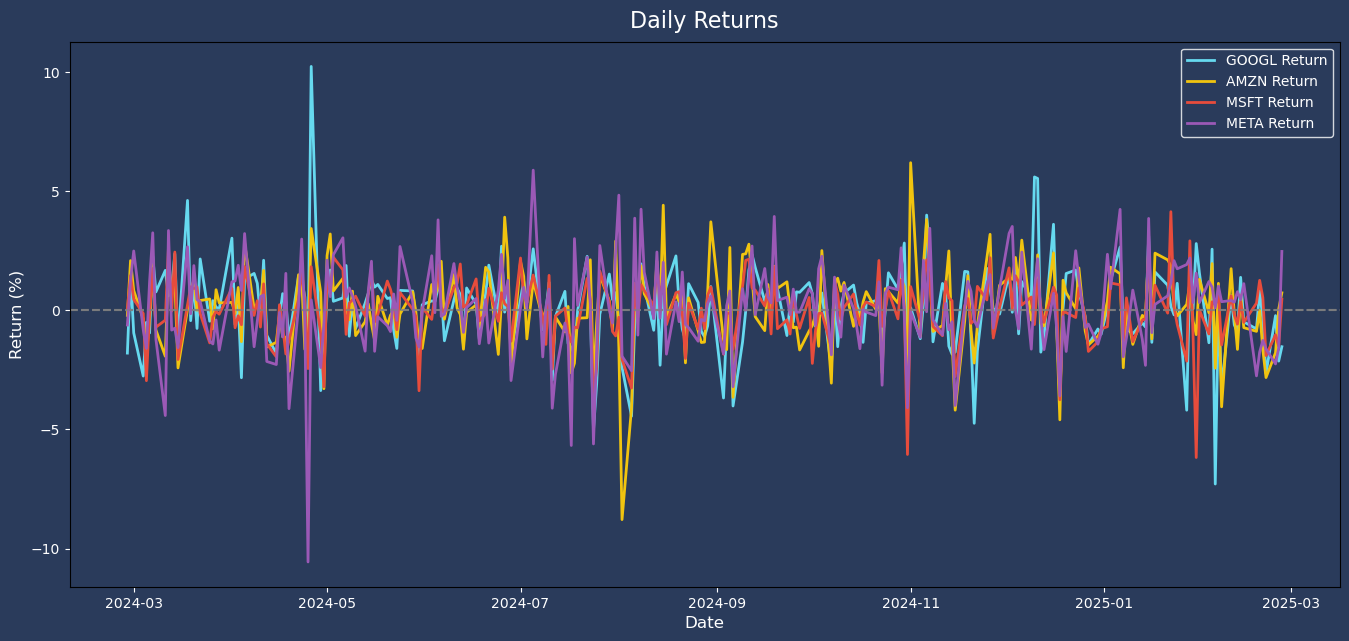

In [1]:
import customtkinter as ctk
import tkinter as tk
from tkinter import ttk, messagebox
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import time

class StockMarketApp:
    def __init__(self):
        self.root = ctk.CTk()
        self.root.title("Stock Market Analysis")
        self.root.geometry("1280x720")
        self.root.protocol("WM_DELETE_WINDOW", self.exit_app)
        
        self.current_mode = "dark"
        ctk.set_appearance_mode(self.current_mode)
        ctk.set_default_color_theme("dark-blue" if self.current_mode == "dark" else "blue")
        
        self.create_header()
        self.create_sidebar()
        self.create_main_area()
        self.stocks = {}  # Dictionary to store multiple stock objects
        self.dfs = {}     # Dictionary to store multiple DataFrames

    # Header and Sidebar remain largely unchanged, only modifying create_sidebar for clarity
    def create_header(self):
        self.header_frame = ctk.CTkFrame(self.root, height=100, corner_radius=0, fg_color="#1f2a44" if self.current_mode == "dark" else "#e6f0fa")
        self.header_frame.pack(side=tk.TOP, fill=tk.X)
        self.header_frame.pack_propagate(False)
        
        ctk.CTkLabel(self.header_frame, text="📈", font=('Helvetica', 40, 'bold')).pack(side=tk.LEFT, padx=(20, 10), pady=10)
        ctk.CTkLabel(self.header_frame, text="Stock Market Analysis", font=('Helvetica', 28, 'bold'), 
                     text_color="#66d9ef" if self.current_mode == "dark" else "#007acc").pack(side=tk.LEFT, pady=10)

    def create_sidebar(self):
        self.sidebar_frame = ctk.CTkFrame(self.root, width=250, corner_radius=0, 
                                         fg_color="#2a3b5b" if self.current_mode == "dark" else "#f0f4f8")
        self.sidebar_frame.pack(side=tk.LEFT, fill=tk.Y)
        self.sidebar_frame.pack_propagate(False)
        
        ctk.CTkLabel(self.sidebar_frame, text="Menu", font=('Helvetica', 20, 'bold'), 
                     text_color="#ffffff" if self.current_mode == "dark" else "#333333").pack(pady=(20, 10))
        
        buttons = [
            ("Enter Tickers", self.show_ticker_input),
            ("Stocks Overview", self.show_stock_overview),
            ("Price History", self.show_price_history),
            ("Volume Chart", self.show_volume_chart),
            ("Daily Returns", self.show_daily_returns),
            ("Moving Average", self.show_moving_average),
            ("Toggle Mode", self.toggle_mode),
            ("Exit", self.exit_app)
        ]
        
        for text, command in buttons:
            btn = ctk.CTkButton(self.sidebar_frame, text=text, command=command, 
                               corner_radius=15, height=45, font=('Helvetica', 14, 'bold'),
                               fg_color="#3b5998" if self.current_mode == "dark" else "#007acc",
                               hover_color="#4a69bd" if self.current_mode == "dark" else "#005f99")
            btn.pack(fill=tk.X, padx=15, pady=8)

    def create_main_area(self):
        self.main_frame = ctk.CTkFrame(self.root, corner_radius=20, 
                                      fg_color="#1e1e2f" if self.current_mode == "dark" else "#ffffff")
        self.main_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=20, pady=20)
        
        ctk.CTkLabel(self.main_frame, 
                    text="Welcome to Stock Market Analysis\nEnter stock tickers (comma-separated) to start", 
                    font=('Helvetica', 16), text_color="#ffffff" if self.current_mode == "dark" else "#333333").pack(expand=True)

    def clear_main_frame(self):
        for widget in self.main_frame.winfo_children():
            widget.destroy()

    def toggle_mode(self):
        self.current_mode = "light" if self.current_mode == "dark" else "dark"
        ctk.set_appearance_mode(self.current_mode)
        ctk.set_default_color_theme("dark-blue" if self.current_mode == "dark" else "blue")
        
        self.header_frame.destroy()
        self.sidebar_frame.destroy()
        self.main_frame.destroy()
        self.create_header()
        self.create_sidebar()
        self.create_main_area()
        
        if hasattr(self, 'last_function'):
            getattr(self, self.last_function)()

    def fetch_stock_data(self, tickers):
        max_retries = 3
        self.stocks.clear()
        self.dfs.clear()
        ticker_list = [t.strip().upper() for t in tickers.split(',')]
        
        for ticker in ticker_list:
            for attempt in range(max_retries):
                try:
                    stock = yf.Ticker(ticker)
                    df = stock.history(period="1y")
                    if df.empty:
                        raise ValueError(f"No data returned for {ticker}. It may be delisted or unavailable.")
                    self.stocks[ticker] = stock
                    self.dfs[ticker] = df
                    break
                except Exception as e:
                    if attempt < max_retries - 1:
                        time.sleep(2)
                        continue
                    messagebox.showerror("Error", f"Failed to fetch data for {ticker} after {max_retries} attempts: {str(e)}")

    def show_ticker_input(self):
        self.last_function = "show_ticker_input"
        self.clear_main_frame()
        
        input_frame = ctk.CTkFrame(self.main_frame, corner_radius=15, fg_color="#2a3b5b" if self.current_mode == "dark" else "#f0f4f8")
        input_frame.pack(expand=True, padx=30, pady=30)
        
        ctk.CTkLabel(input_frame, text="Enter Stock Tickers (comma-separated):", font=('Helvetica', 18, 'bold'), 
                     text_color="#ffffff" if self.current_mode == "dark" else "#333333").pack(pady=15)
        self.ticker_entry = ctk.CTkEntry(input_frame, width=350, height=40, corner_radius=10, 
                                        font=('Helvetica', 14), placeholder_text="e.g., GOOGL, AAPL, MSFT")
        self.ticker_entry.pack(pady=15)
        
        ctk.CTkButton(input_frame, text="Fetch Data", command=self.analyze_tickers, 
                     corner_radius=10, height=45, font=('Helvetica', 14, 'bold'),
                     fg_color="#3b5998" if self.current_mode == "dark" else "#007acc",
                     hover_color="#4a69bd" if self.current_mode == "dark" else "#005f99").pack(pady=20)

    def analyze_tickers(self):
        tickers = self.ticker_entry.get()
        self.fetch_stock_data(tickers)
        if self.stocks:
            messagebox.showinfo("Success", f"Data successfully fetched for {', '.join(self.stocks.keys())}!")
            self.show_stock_overview()

    def show_stock_overview(self):
        self.last_function = "show_stock_overview"
        if not self.stocks:
            self.show_ticker_input()
            return
        
        self.clear_main_frame()
        overview_frame = ctk.CTkScrollableFrame(self.main_frame, corner_radius=15, 
                                               fg_color="#2a3b5b" if self.current_mode == "dark" else "#f0f4f8")
        overview_frame.pack(fill=tk.BOTH, expand=True, padx=30, pady=30)
        
        for ticker, stock in self.stocks.items():
            df = self.dfs[ticker]
            stock_frame = ctk.CTkFrame(overview_frame, corner_radius=10, fg_color="#1f2a44" if self.current_mode == "dark" else "#e6f0fa")
            stock_frame.pack(fill=tk.X, pady=10, padx=10)
            
            ctk.CTkLabel(stock_frame, text=f"{stock.info['longName']} ({ticker})", 
                        font=('Helvetica', 18, 'bold'), text_color="#66d9ef" if self.current_mode == "dark" else "#007acc").pack(pady=10)
            
            info = stock.info
            stats = [
                ("Sector:", info.get('sector', 'N/A')),
                ("Industry:", info.get('industry', 'N/A')),
                ("Current Price:", f"${df['Close'][-1]:,.2f}"),
                ("Market Cap:", f"${info.get('marketCap', 0):,.2f}"),
                ("52 Week High:", f"${info.get('fiftyTwoWeekHigh', 0):,.2f}"),
                ("52 Week Low:", f"${info.get('fiftyTwoWeekLow', 0):,.2f}"),
                ("Average Volume:", f"{info.get('averageVolume', 0):,}")
            ]
            
            for label, value in stats:
                stat_frame = ctk.CTkFrame(stock_frame, fg_color="transparent")
                stat_frame.pack(fill=tk.X, pady=5)
                ctk.CTkLabel(stat_frame, text=label, font=('Helvetica', 12, 'bold'), 
                            text_color="#ffffff" if self.current_mode == "dark" else "#333333").pack(side=tk.LEFT, padx=10)
                ctk.CTkLabel(stat_frame, text=value, font=('Helvetica', 12), 
                            text_color="#ffffff" if self.current_mode == "dark" else "#333333").pack(side=tk.LEFT)

    def plot_chart(self, title, plot_func, ylabel="Price ($)", xlabel="Date"):
        self.clear_main_frame()
        chart_frame = ctk.CTkFrame(self.main_frame, corner_radius=15, 
                                  fg_color="#2a3b5b" if self.current_mode == "dark" else "#f0f4f8")
        chart_frame.pack(fill=tk.BOTH, expand=True, padx=30, pady=30)
        
        ctk.CTkLabel(chart_frame, text=title, font=('Helvetica', 20, 'bold'), 
                    text_color="#66d9ef" if self.current_mode == "dark" else "#007acc").pack(pady=15)
        
        fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
        bg_color = '#2a3b5b' if self.current_mode == "dark" else '#f0f4f8'
        text_color = '#ffffff' if self.current_mode == "dark" else '#333333'
        colors = ['#66d9ef', '#f1c40f', '#e74c3c', '#9b59b6']  # Multiple colors for different stocks
        
        fig.patch.set_facecolor(bg_color)
        ax.set_facecolor(bg_color)
        
        for i, (ticker, df) in enumerate(self.dfs.items()):
            plot_func(ax, df, ticker, colors[i % len(colors)])
        
        ax.set_title(title, color=text_color, fontsize=16, pad=10)
        ax.set_xlabel(xlabel, color=text_color, fontsize=12)
        ax.set_ylabel(ylabel, color=text_color, fontsize=12)
        ax.tick_params(colors=text_color)
        ax.legend(facecolor=bg_color, edgecolor=text_color, labelcolor=text_color)
        plt.tight_layout()
        
        canvas = FigureCanvasTkAgg(fig, master=chart_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    def show_price_history(self):
        self.last_function = "show_price_history"
        if not self.dfs:
            self.show_ticker_input()
            return
        
        def plot_price(ax, df, ticker, color):
            ax.plot(df.index, df['Close'], label=f'{ticker} Close', color=color, linewidth=2)
            ax.legend()
        
        self.plot_chart("Price History", plot_price)

    def show_volume_chart(self):
        self.last_function = "show_volume_chart"
        if not self.dfs:
            self.show_ticker_input()
            return
        
        def plot_volume(ax, df, ticker, color):
            ax.bar(df.index, df['Volume'], label=f'{ticker} Volume', color=color, alpha=0.6)
            ax.legend()
        
        self.plot_chart("Trading Volume", plot_volume, ylabel="Volume")

    def show_daily_returns(self):
        self.last_function = "show_daily_returns"
        if not self.dfs:
            self.show_ticker_input()
            return
        
        for ticker in self.dfs:
            self.dfs[ticker]['Daily_Return'] = self.dfs[ticker]['Close'].pct_change() * 100
        
        def plot_returns(ax, df, ticker, color):
            ax.plot(df.index, df['Daily_Return'], label=f'{ticker} Return', color=color, linewidth=2)
            ax.axhline(0, color='grey', linestyle='--', alpha=0.5)
            ax.legend()
        
        self.plot_chart("Daily Returns", plot_returns, ylabel="Return (%)")

    def show_moving_average(self):
        self.last_function = "show_moving_average"
        if not self.dfs:
            self.show_ticker_input()
            return
        
        for ticker in self.dfs:
            self.dfs[ticker]['MA_50'] = self.dfs[ticker]['Close'].rolling(window=50).mean()
        
        def plot_ma(ax, df, ticker, color):
            ax.plot(df.index, df['Close'], label=f'{ticker} Close', color=color, linewidth=2)
            ax.plot(df.index, df['MA_50'], label=f'{ticker} 50-Day MA', color=color, linestyle='--', linewidth=2)
            ax.legend()
        
        self.plot_chart("Price with 50-Day Moving Average", plot_ma)

    def exit_app(self):
        if messagebox.askyesno("Confirm Exit", "Are you sure you want to exit?"):
            self.root.destroy()

    def run(self):
        style = ttk.Style()
        if self.current_mode == "dark":
            style.configure("Custom.Treeview", background="#2a3b5b", foreground="white", 
                          fieldbackground="#2a3b5b", borderwidth=0)
        else:
            style.configure("Custom.Treeview", background="#f0f4f8", foreground="black", 
                          fieldbackground="#f0f4f8", borderwidth=0)
        style.configure("Custom.Treeview.Heading", font=('Helvetica', 12, 'bold'))
        
        self.root.mainloop()

if __name__ == "__main__":
    app = StockMarketApp()
    app.run()